In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
import imageio
import keras
from random import choice


In [3]:
root_dir = os.path.abspath('C:\\Users\\Rahul Jakhad\\Downloads\\digit recognition')


In [4]:
train = pd.read_csv(os.path.join(root_dir, 'Train', 'train.csv'))
test = pd.read_csv(os.path.join(root_dir, 'Test.csv'))

sample_submission = pd.read_csv(os.path.join(root_dir, 'Sample_Submission.csv'))

In [5]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [6]:
img_name = choice(train.filename)

In [7]:
filepath = os.path.join(root_dir, 'Train', 'Images', 'train', img_name)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


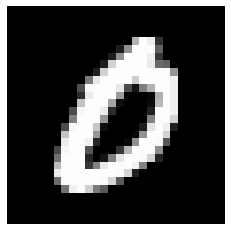

In [8]:
img = imread(filepath, flatten=True)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 177., 255., 238.,  48.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [10]:
image_path = os.path.join(root_dir, 'Train', 'Images', 'train', img_name)

In [11]:
temp = []
for img_name in train.filename:
    
    image_path = os.path.join(root_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  """


In [12]:
temp = []
for img_name in test.filename:
    image_path = os.path.join(root_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [13]:
train_x = train_x.flatten().reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))


In [14]:
train_x.shape

(49000, 784)

In [15]:
test_x = test_x.flatten().reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))


In [16]:
test_x.shape

(21000, 784)

In [17]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train.label.values[:split_size], train.label.values[split_size:]

In [18]:
train_y.shape

(34300,)

In [19]:
train_y = train_y.reshape((train_y.shape[0] , 1))
from keras.utils import to_categorical
train_y = to_categorical(train_y)
val_y = to_categorical(val_y)

print(train_y.shape , val_y.shape)

(34300, 10) (14700, 10)


In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model = Sequential()

In [22]:
model.add(Dense(32, activation='relu',  input_dim = 28*28))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit( train_x, train_y,epochs=20,batch_size=32  ,validation_data=(val_x, val_y))


Train on 34300 samples, validate on 14700 samples
Epoch 1/20
34300/34300 [==============================] - 2s 50us/step - loss: 2.8764 - accuracy: 0.5359 - val_loss: 1.2400 - val_accuracy: 0.6380
Epoch 2/20
34300/34300 [==============================] - 1s 39us/step - loss: 0.9794 - accuracy: 0.7113 - val_loss: 0.9008 - val_accuracy: 0.7587
Epoch 3/20
34300/34300 [==============================] - 1s 40us/step - loss: 0.7371 - accuracy: 0.7928 - val_loss: 0.7074 - val_accuracy: 0.7995
Epoch 4/20
34300/34300 [==============================] - 2s 46us/step - loss: 0.5781 - accuracy: 0.8380 - val_loss: 0.5891 - val_accuracy: 0.8595
Epoch 5/20
34300/34300 [==============================] - 1s 39us/step - loss: 0.4645 - accuracy: 0.8766 - val_loss: 0.4893 - val_accuracy: 0.8851
Epoch 6/20
34300/34300 [==============================] - 1s 40us/step - loss: 0.4085 - accuracy: 0.8903 - val_loss: 0.4699 - val_accuracy: 0.8907
Epoch 7/20
34300/34300 [==============================] - 1s 42us/s

In [46]:
predictions = model.predict(test_x)

In [48]:
prediction = predictions.argmax(axis = 1)
prediction


array([4, 0, 9, ..., 6, 6, 2], dtype=int64)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


15862
Prediction is:  3


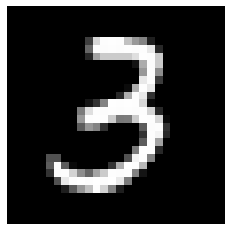

In [62]:
img_name = choice(test.filename)
filepath = os.path.join(root_dir, 'Train', 'Images', 'test', img_name)
img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - 49000
print(test_index)

print ("Prediction is: ", prediction[test_index ])

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


In [69]:
sample_submission.label = prediction

In [74]:
sample_submission.to_csv("prediction.csv")

In [72]:
test_x.shape

(21000, 784)

In [75]:
dff = pd.read_csv("prediction.csv")

In [76]:
dff.head()

,Unnamed: 0,filename,label
0,0,49000.png,4
1,1,49001.png,0
2,2,49002.png,9
3,3,49003.png,7
4,4,49004.png,9
